In [1]:
import pandas as pd

# Read a CSV file with semicolon delimiter
df = pd.read_csv('data.csv', delimiter=',')

# Display the first five rows of the DataFrame
df = pd.DataFrame(df)
df

FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

In [28]:
import re
match_gejala = ['covid','sars-cov-2','corona','batuk','batuk kering','pilek','kelelahan','sakit kepala','demam','sesak nafas','omicron','delta','tenggorokan','anosmia','diare']

# Membuat kolom baru yang mana nanti digunakan untuk menampung frekuensi disetiap gejalas
for i in match_gejala:
    df[i] = 0

# Fungsi untuk menghitung frekuensi
def getFrekuensi(data, match_gejala):
    temp = str(data).split()
    regex_pattern = r"\b(" + "|".join(match_gejala) + r")\b"
    matching = [s for s in temp if re.search(regex_pattern, s)]
    return matching
    
# Proses pengambilan kolom final_tweet
for idx in range(len(df["final_tweet"])):
    freq = {}
    # Hitung frekuensi tiap record
    mask = getFrekuensi(df["final_tweet"][idx],match_gejala)        
    for i in mask:
        if i in freq.keys():
            freq[i] = 1 + freq[i]
        else:
            freq[i] = 1    
    
    for key,value in freq.items():
        df.iloc[idx, df.columns.get_loc(key)] = value   

df

,Unnamed: 0,id,date,username,latitude,longitude,final_tweet,covid,sars-cov-2,corona,...,pilek,kelelahan,sakit kepala,demam,sesak nafas,omicron,delta,tenggorokan,anosmia,diare
0,0,1387917769501515778,2021-04-29 23:52:37+00:00,MaseebAkhter,24.972077,67.064381,rd jumma mubarak,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1387914934533513220,2021-04-29 23:41:21+00:00,PolsekPlaju3,-3.190822,104.794609,lawan covid sinergitas tni polri cegah tular c...,2,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1387913431865610244,2021-04-29 23:35:22+00:00,irfania_real,31.315389,74.222395,jummah mubarak,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1387911958393987075,2021-04-29 23:29:31+00:00,kenny_thok,-2.455096,111.930698,semangat ya neng isolasi pakai sek pondok deri...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1387907774441566213,2021-04-29 23:12:54+00:00,kejarirohul,0.902542,100.308263,kamis tanggal april kepala seksi intelijen ari...,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8109,9332,1536673294782709760,2022-06-14 11:33:58+00:00,StellaSuwardi,-6.297602,106.770437,vaksinasi booster tingkat imunitas varian omic...,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8110,9333,1536525461077262336,2022-06-14 01:46:31+00:00,natasya_puspa4,-6.364100,106.799599,jokowi menteri waspada hati hati varian omicro...,1,0,0,...,0,0,0,0,0,1,0,0,0,0
8111,9335,1536515216665899013,2022-06-14 01:05:49+00:00,Agistasyahka,-6.301652,106.974561,sebar virus omicron ba ba cepat banding varian...,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8112,9336,1536358141377384448,2022-06-13 14:41:39+00:00,Ardi_Wdyto,-7.776581,113.198255,varian omicron,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [29]:
from sklearn.cluster import DBSCAN,OPTICS,cluster_optics_dbscan
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

# Inisialisasi kolom yang akan diproses
list_features = ['covid', 'sars-cov-2', 'corona', 'batuk', 'batuk kering',
       'pilek', 'kelelahan', 'sakit kepala', 'demam', 'sesak nafas', 'omicron',
       'delta', 'tenggorokan', 'anosmia', 'diare']
f_data = df[list_features]

# Copy isi frekuensi pada fitur
temporary = f_data

# Inisialisasi kolom yang akan di tampilkan di geovisualisasi       
label_id = ['latitude','longitude','username','final_tweet']
id_data = df[label_id]

# PCA merupakan reduksi fitur
# Disini hanya berfungsi agar mudah untuk dilakukan visualisasi menggunakan scatter plot
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(f_data)

In [35]:
# Cluster using DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=20)
dbscan_labels = dbscan.fit_predict(X_pca)
dbscan_n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

# Cluster using OPTICS
optics = OPTICS(min_samples=20)
optics.fit(X_pca)
optics_labels = optics.labels_
reachability = optics.reachability_
optics_n_clusters = len(set(optics_labels)) - (1 if -1 in optics_labels else 0)

# Cluster using cluster_optics_dbscan
cluster = cluster_optics_dbscan(reachability=optics.reachability_, core_distances=optics.core_distances_, ordering=optics.ordering_, eps=0.5)
cluster_n_clusters = len(set(cluster)) - (1 if -1 in cluster else 0)

# Menghitung noise
# Merupakan salah satu metode untuk menghitung seberapa bagus metode dalam melakukan klusterisasi
noise_dbscan = sum(dbscan_labels == -1) / len(dbscan_labels)
noise_optics = sum(optics_labels == -1) / len(optics_labels)
noise_optics_dbscan = sum(cluster == -1) / len(cluster)


# print(noise_dbscan)
# print(noise_optics)
# print(noise_optics_dbscan)
# print(dbscan_n_clusters)
# print(optics_n_clusters)
# print(cluster_n_clusters)
for l in range(-1,dbscan_n_clusters):
    print("Label ",l," Total => ",sum(dbscan_labels == l))

# Mencari maksimum gejala di setiap data
max_cols = temporary.idxmax(axis=1)
frq = {
    'covid': [], 
    'sars-cov-2': [], 
    'corona': [], 
    'batuk': [], 
    'batuk kering': [],
    'pilek': [], 
    'kelelahan': [], 
    'sakit kepala': [], 
    'demam': [], 
    'sesak nafas': [], 
    'omicron': [],
    'delta': [], 
    'tenggorokan': [], 
    'anosmia': [], 
    'diare': []
}
idx = 0
for lbl in max_cols:
    if lbl in frq.keys():
        frq[lbl].append(dbscan_labels[idx])    
    idx+=1

print("\n")
for key,item in frq.items():
    print(key)    
    tmpItem = np.array(item)    
    for l in range(-1,dbscan_n_clusters):        
        print("Label ",l," Total => ",sum(tmpItem == l))
    print("\n")

Label  -1  Total =>  90
Label  0  Total =>  6369
Label  1  Total =>  59
Label  2  Total =>  1469
Label  3  Total =>  127


covid
Label  -1  Total =>  25
Label  0  Total =>  3931
Label  1  Total =>  59
Label  2  Total =>  0
Label  3  Total =>  0


sars-cov-2
Label  -1  Total =>  0
Label  0  Total =>  0
Label  1  Total =>  0
Label  2  Total =>  0
Label  3  Total =>  0


corona
Label  -1  Total =>  0
Label  0  Total =>  71
Label  1  Total =>  0
Label  2  Total =>  3
Label  3  Total =>  0


batuk
Label  -1  Total =>  24
Label  0  Total =>  954
Label  1  Total =>  0
Label  2  Total =>  143
Label  3  Total =>  0


batuk kering
Label  -1  Total =>  0
Label  0  Total =>  0
Label  1  Total =>  0
Label  2  Total =>  0
Label  3  Total =>  0


pilek
Label  -1  Total =>  0
Label  0  Total =>  544
Label  1  Total =>  0
Label  2  Total =>  31
Label  3  Total =>  0


kelelahan
Label  -1  Total =>  0
Label  0  Total =>  0
Label  1  Total =>  0
Label  2  Total =>  0
Label  3  Total =>  0


sakit kepala


/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/cluster/_optics.py:903: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


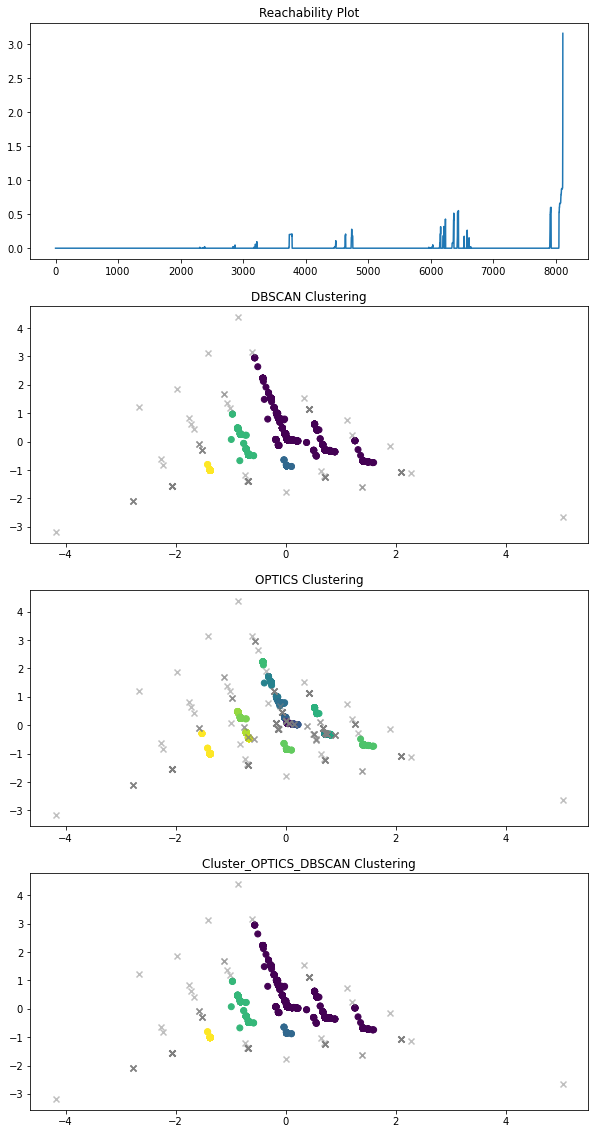

In [5]:
fig, axs = plt.subplots(4, 1, figsize=(10, 20))
axs[0].plot(np.arange(len(reachability)), reachability[optics.ordering_])
axs[0].set_title("Reachability Plot")
axs[1].scatter(X_pca[dbscan_labels!=-1, 0], X_pca[dbscan_labels!=-1, 1], c=dbscan_labels[dbscan_labels!=-1], cmap='viridis')
axs[1].scatter(X_pca[dbscan_labels==-1, 0], X_pca[dbscan_labels==-1, 1], c='grey', alpha=0.5, marker='x')
axs[1].set_title("DBSCAN Clustering")
axs[2].scatter(X_pca[optics_labels!=-1, 0], X_pca[optics_labels!=-1, 1], c=optics_labels[optics_labels!=-1], cmap='viridis')
axs[2].scatter(X_pca[optics_labels==-1, 0], X_pca[optics_labels==-1, 1], c='grey', alpha=0.5, marker='x')
axs[2].set_title("OPTICS Clustering")
axs[3].scatter(X_pca[cluster!=-1, 0], X_pca[cluster!=-1, 1], c=cluster[cluster!=-1], cmap='viridis')
axs[3].scatter(X_pca[cluster==-1, 0], X_pca[cluster==-1, 1], c='grey', alpha=0.5, marker='x')
axs[3].set_title("Cluster_OPTICS_DBSCAN Clustering")
plt.show()

In [14]:
id_data["label"] = optics_labels
import geopandas as gpd
from shapely.geometry import Point
gdf = gpd.GeoDataFrame(id_data, geometry=gpd.points_from_xy(id_data['longitude'], id_data['latitude']))
gdf

/var/folders/hl/mlr498y964v0sbm6tm8zpn9m0000gn/T/ipykernel_5167/3304288547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  id_data["label"] = optics_labels


,latitude,longitude,username,final_tweet,label,geometry
0,24.972077,67.064381,MaseebAkhter,rd jumma mubarak,0,POINT (67.06438 24.97208)
1,-3.190822,104.794609,PolsekPlaju3,lawan covid sinergitas tni polri cegah tular c...,18,POINT (104.79461 -3.19082)
2,31.315389,74.222395,irfania_real,jummah mubarak,0,POINT (74.22239 31.31539)
3,-2.455096,111.930698,kenny_thok,semangat ya neng isolasi pakai sek pondok deri...,0,POINT (111.93070 -2.45510)
4,0.902542,100.308263,kejarirohul,kamis tanggal april kepala seksi intelijen ari...,12,POINT (100.30826 0.90254)
...,...,...,...,...,...,...
8109,-6.297602,106.770437,StellaSuwardi,vaksinasi booster tingkat imunitas varian omic...,1,POINT (106.77044 -6.29760)
8110,-6.364100,106.799599,natasya_puspa4,jokowi menteri waspada hati hati varian omicro...,13,POINT (106.79960 -6.36410)
8111,-6.301652,106.974561,Agistasyahka,sebar virus omicron ba ba cepat banding varian...,1,POINT (106.97456 -6.30165)
8112,-7.776581,113.198255,Ardi_Wdyto,varian omicron,1,POINT (113.19826 -7.77658)


In [16]:
import folium
from matplotlib import colors

# Create a map centered on the first point in the GeoDataFrame
m = folium.Map(location=[gdf['latitude'][0], gdf['longitude'][0]], zoom_start=5)

colors = ['black', 'pink', 'green', 'beige', 'orange', 'lightgray', 'lightblue', 'purple', 'darkpurple', 'cadetblue', 'lightgreen', 'white', 'darkred', 'darkblue', 'lightred', 'blue', 'red', 'darkgreen', 'gray']
print(len(colors))

for idx, row in gdf.iterrows():    
    if idx == 200:
        break        
    color = colors[row['label']]
    if row['label'] > -1:
        folium.Marker(location=[row['latitude'], row['longitude']], popup=row['username'] +': \n'+ row['final_tweet'],
                  icon=folium.Icon(color=color)).add_to(m)   
m

19
